In [35]:
import netket as nk
import netket.experimental as nkx
from netket.experimental.operator.fermion import destroy as c
from netket.experimental.operator.fermion import create as cdag
from netket.experimental.operator.fermion import number as nc
from scipy.sparse.linalg import eigsh
import numpy as np
import scipy.sparse.linalg
import jax
import jax.numpy as jnp
import json
import matplotlib.pyplot as plt

import sys, os
sys.path.append('/Users/wttai/Documents/Jupyter/machine_learning/common_lib')
sys.path.append('/home1/wttai/machine_learning/common_lib')
from models import get_qwz_graph, get_qwz_Ham, cdag_, c_
from networks import *
from helper import get_ed_data
import h5py
from tenpy.tools import hdf5_io

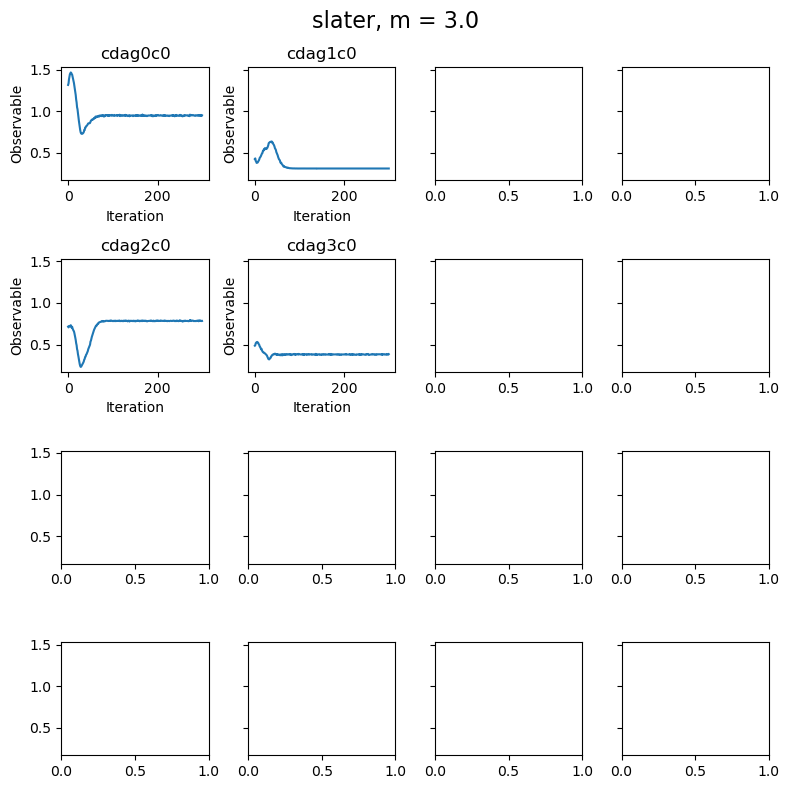

In [36]:
L = 2
N = L ** 2
t = 1.0
m = 3.0
U = 0.0
model = "slater"

data_netket=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_t={t}_m={m}_U={U}.log"))


x_values = np.arange(len(data_netket['cdag0c0']['Mean']['real']))

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data_netket[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


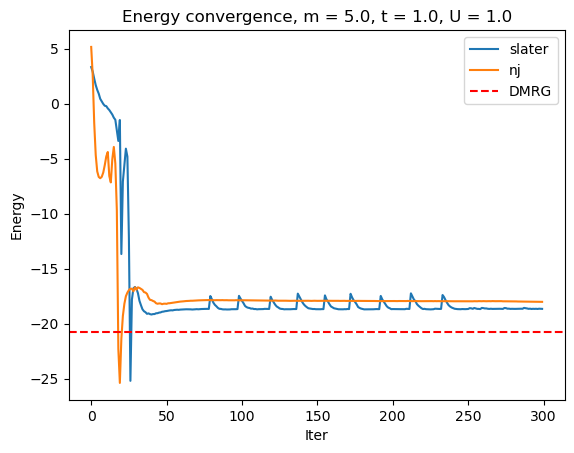

In [43]:
t = 1.0
m = 5.0
U = 1.0
plt.title(f"Energy convergence, m = {m}, t = {t}, U = {U}")
model = "slater"
data_slater=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_t={t}_m={m}_U={U}.log"))
plt.plot(data_slater['Energy']['Mean']['real'], label = f"{model}")
model = "nj"
data_nj=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_t={t}_m={m}_U={U}.log"))
plt.plot(data_nj['Energy']['Mean']['real'], label = f"{model}")
plt.xlabel("Iter")
plt.ylabel("Energy")

outputFilename=f"machine_learning/dmrg_qwz/data/dmrg_log_L={L}_t={t}_m={m}_U={U}"
with h5py.File(outputFilename, 'r') as f:
    data_dmrg = hdf5_io.load_from_hdf5(f)
plt.axhline(y=data_dmrg['E0'], color='r', linestyle='--', label='DMRG')  # Adding the horizontal line
plt.legend()

/home1/wttai/TeNPy/tenpy/tools/hdf5_io.py:1104: UserWarning: Can't import class FermiHubbardSquare from __main__
  warnings.warn(msg, UserWarning)


In [17]:
data_dmrg['E0']

-57.06720917538769

In [9]:
data

{'E0': -57.06720917538769,
 'model': <tenpy.tools.hdf5_io.Hdf5Ignored at 0x2ba51e9e6810>,
 'parameters': {'L': 16, 'U': 0.0, 'm': 3.0, 't': 1.0},
 'psi': <tenpy.networks.mps.MPS at 0x2ba5284affb0>,
 'sweepstats': {'Delta_E': [nan,
   -0.00526740938158099,
   -0.003591701485625265,
   -0.004120894120248408,
   -0.0032906261817728932,
   -0.002427270714953522,
   -0.0018005133582690291,
   -0.0018161195544692532,
   -0.0013524649419878187,
   -0.001277518559248847,
   -0.0009113541281138282,
   -0.0015673047380033722,
   -0.00024533464281972783,
   -0.00011987367430066342,
   -4.208840448427509e-05,
   -0.00017726239230597685,
   -0.0001120852198610578,
   -1.934068064457506e-05,
   -5.019208896328564e-05],
  'Delta_S': [1.0682856422896312,
   0.09300307498635618,
   -0.006661597628361493,
   -0.0032400537412304864,
   -0.00140319916163123,
   0.0010667907567849522,
   0.0013527964696005146,
   0.0016961017980954285,
   0.0011142298272406315,
   0.0012281462445562497,
   0.00194440706447

In [7]:
import h5py
from tenpy.tools import hdf5_io

outputFilename=f"machine_learning/dmrg_qwz/data/dmrg_log_L={L}_t={t}_m={m}_U={U}"

with h5py.File(outputFilename, 'r') as f:
    data = hdf5_io.load_from_hdf5(f)




# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

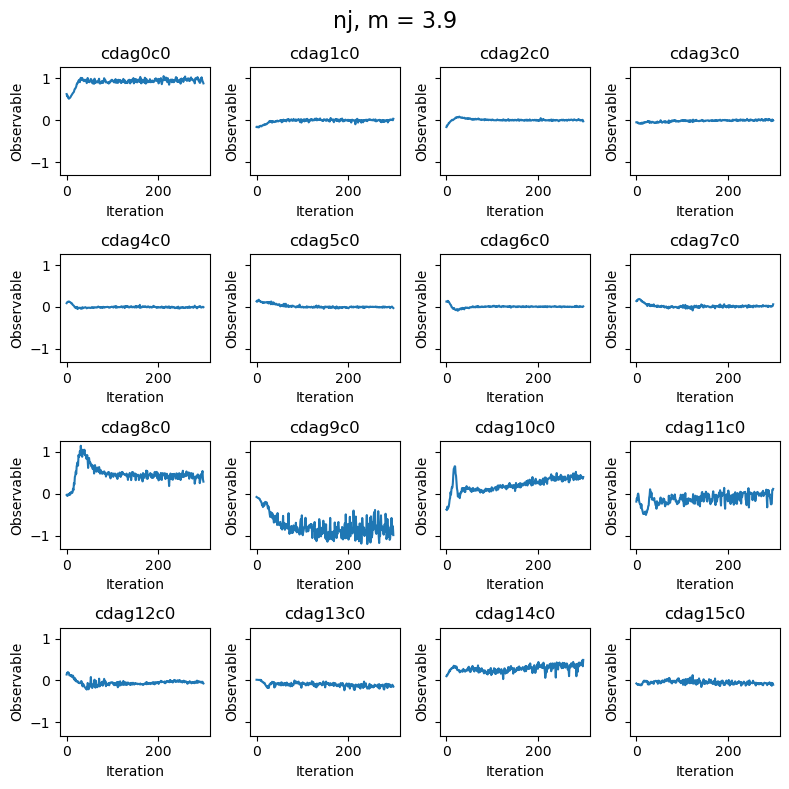

In [31]:
L = 4
N = L ** 2
m = 3.9
model = "nj"

data=json.load(open(f"machine_learning/netket_qwz/data/{model}_log_L={L}_m={m}.log"))


x_values = np.arange(len(data['cdag0c0']['Mean']['real']))

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 4, figsize=(8, 8), sharey=True)

for i in range(N):
    x = i // L
    y = i % L
    corr = f"cdag{i}c0"
    axs[x][y].plot(x_values, data[corr]['Mean']['real'], label=corr)
    axs[x][y].set_title(corr)
    axs[x][y].set_xlabel('Iteration')
    axs[x][y].set_ylabel('Observable')

fig.suptitle(f'{model}, m = {m}', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Energy')

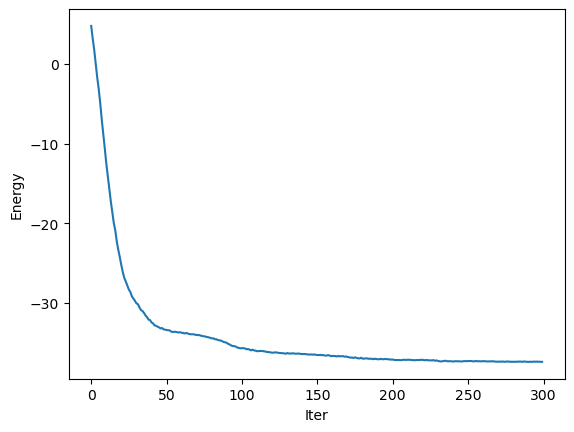